# Examen Final

In [1]:
import numpy as np
import time

from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from sklearn import metrics

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_mldata

from PIL import Image

# Principal Component Analysis (PCA)

### Cargando los Datos (MNIST)

In [2]:
mnist = fetch_mldata('MNIST original')

X, target_labels = mnist["data"], mnist["target"]

X.shape

(70000, 784)

In [3]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = target_labels[:60000], target_labels[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

#### Iniciamos PCA

In [4]:
pca = PCA(0.90)

Las imagenes tienen 784 features (28x28 pixeles), la idea es ir de 784 a 87, con el objetivo de reducir el tiempo de ejecucion del algoritmo.

Reducimos la dimensionalidad de las features(utilizamos X_train)

In [5]:
### INICIO: TU CODIGO AQUI: utiliza la funcion fit_transform (~1 linea)###
lower_dimensional_data = pca.fit_transform(X_train)
### FIN ##

In [6]:
## El resultado deberia de ser 87
pca.n_components_

87

In [7]:
## NO HAY QUE MODIFICAR NADA, SOLO EJECUTA LA CELDA
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(X_train[1].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 87 principal components
approximation = pca.inverse_transform(lower_dimensional_data)
plt.subplot(1, 2, 2);
plt.imshow(approximation[1].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('87 components', fontsize = 14)
plt.title('90% of Explained Variance', fontsize = 20);

Debido a la reducción de dimensionalidad, hay compresión en el data set resultante lo que implica cierta perdida de información, la imagen de la derecha se ve un poco mas borrosa, ahora tememos que evaluar si entrenar un modelo con esta imagen tiene el mismo rendimiento que al usar la imagen original.

### Clasificacion binaria

Se van a entrenar 2 modelos de clasificación binaria, uno utilizando las imágenes originales y otro modelo con las imágenes a las que se le aplico PCA para reducir la dimensionalidad.


#### Clasificacion binaria sin PCA

In [8]:
## NO HAY QUE MODIFICAR NADA, SOLO EJECUTA LA CELDA

from sklearn.linear_model import SGDClassifier

y_train_0 = (y_train == 0)  
y_test_0 = (y_test == 0)

In [9]:
## NO HAY QUE MODIFICAR NADA, SOLO EJECUTA LA CELDA
start_time = time.time()

sgd_clf = SGDClassifier(random_state=42, max_iter=200)
sgd_clf.fit(X_train, y_train_0)

no_pca_time = time.time() - start_time
print("--- %s segundos, SGDClassifier Binario, sin PCA ---" % (no_pca_time))

--- 17.77092933654785 segundos, SGDClassifier Binario, sin PCA ---


In [10]:
## NO HAY QUE MODIFICAR NADA, SOLO EJECUTA LA CELDA
train_prediction = sgd_clf.predict(X_train)

In [11]:
## NO HAY QUE MODIFICAR NADA, SOLO EJECUTA LA CELDA
print("Classification report for classifier %s:\n%s\n"
      % (sgd_clf, metrics.classification_report(y_train_0, train_prediction)))

Classification report for classifier SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=200, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False):
             precision    recall  f1-score   support

      False       0.99      1.00      1.00     54077
       True       0.98      0.94      0.96      5923

avg / total       0.99      0.99      0.99     60000




#### Clasificacion Binaria con PCA

In [12]:
## NO HAY QUE MODIFICAR NADA, SOLO EJECUTA LA CELDA
start_time = time.time()

sgd_clf_pca = SGDClassifier(random_state=42, max_iter=200)
sgd_clf_pca.fit(lower_dimensional_data, y_train_0)

pca_time = time.time() - start_time
print("--- %s segundos, SGDClassifier Binario, con PCA ---" % (pca_time))

--- 4.025429964065552 segundos, SGDClassifier Binario, con PCA ---


In [13]:
## NO HAY QUE MODIFICAR NADA, SOLO EJECUTA LA CELDA
train_prediction = sgd_clf_pca.predict(lower_dimensional_data)

In [14]:
## NO HAY QUE MODIFICAR NADA, SOLO EJECUTA LA CELDA
print("Classification report for classifier %s:\n%s\n"
      % (sgd_clf_pca, metrics.classification_report(y_train_0, train_prediction)))

Classification report for classifier SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=200, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False):
             precision    recall  f1-score   support

      False       0.99      0.99      0.99     54077
       True       0.94      0.95      0.95      5923

avg / total       0.99      0.99      0.99     60000




En la celda de abajo describe que diferencias hay entre el modelo de clasificación binario sin PCA y en el que se redujo la dimensionalidad de las feautres.

En el modelo sin PCA el tiempo de entrenar al modelo fue mucho mayor al del modelo con PCA (17 segundos vs. 4 segundos). Podemos imaginar que con más datos esta diferencia sería más notable cada vez. Viendo las métricas de performance, el modelo donde no se reduce la dimensionalidad es ligeramente mejor en sus scores de recall y de f1, pero es una diferencia de 0.01, lo cual es casi nada. Se puede concluir que es mejor el modelo con PCA ya que toma menos tiempo y da resultados prácticamente tan buenos como los del modelo sin PCA. También podemos decir que PCA hizo un buen trabajo en reducir la dimensionalidad manteniendo la esencia de los features.

# T-Distributed Stochastic Neighbouring Entities (t-SNE)

t-Distributed Stochastic Neighbor Embedding (t-SNE) es otra técnica para reducción de la dimensionalidad, esta vez contrario a PCA no es una técnica matemática sino que es una técnica probabilística.

In [15]:
## NO HAY QUE MODIFICAR NADA, SOLO EJECUTA LA CELDA
mnist = fetch_mldata('MNIST original')

X, target_labels = mnist["data"], mnist["target"]

In [16]:
## NO HAY QUE MODIFICAR NADA, SOLO EJECUTA LA CELDA
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = target_labels[:60000], target_labels[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [17]:
time_start = time.time()

n_sne = 10000
x = shuffle_index.reshape(-1, 1)[:n_sne]

### INICIO: TU CODIGO AQUI: Inicializa el modelo t-SNE utlizando sklean con 2 componentes  (~1 linea)###
tsne = TSNE(n_components=2)

### INICIO: TU CODIGO AQUI: Utlinza la funcion fit_transform utiliza la variable x  (~1 linea)###
tsne_results = tsne.fit_transform(x)


print('t-SNE completado! Tiempo: {%s} seconds' % format(time.time()-time_start))

t-SNE completado! Tiempo: {332.1392412185669} seconds


In [18]:
## NO HAY QUE MODIFICAR NADA, SOLO EJECUTA LA CELDA
import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)

df_tsne = df.loc[shuffle_index[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne['label'] = y_train[:n_sne]
df_tsne[['x-tsne','y-tsne','label']][:10]

,x-tsne,y-tsne,label
9819,-25.017473,-1.439111,1.0
47328,37.234398,-79.680099,7.0
52893,-21.954102,51.705685,8.0
47524,33.478634,-82.767387,7.0
13745,1.729633,13.295444,2.0
49572,-36.766460,-74.884888,8.0
48619,-12.607008,-93.847237,8.0
45020,96.980476,-6.217443,7.0
5510,29.329824,0.294825,0.0
29372,20.162956,-35.446590,4.0


# K-means

Vamos a implementar K-means(clustering,aprendizaje no supervisado) con sklearn, vamos a filtrar los archivos de entrada y solo vamos a utilizar únicamente 3 razas de perros 'golden_retriever', 'german_shepherd', 'american_staffordshire_terrier', es decir haremos un filtrado de datos para tener solo 3 razas

Nota: en este caso usaremos datos para los cuales ya se conoce la clase o variable destino "y" ,y usaremos 3 clusters en k-mens ,pero esto es solo ejemplo para entender el resultado, en un problema real de aprendizaje no supervisado, puede que solo conozcamos las features X

##### Pre-procesamiento
La data ya fue procesada y se extrajeron las features de las imágenes con google Inception, esto se conoce como transfer learning, luego estas features fueron almacenadas con numpy. 

Transfer learning es utilizar el conocimiento adquirido en tareas en las que existen muchos datos y luego aplicar este conocimiento en nuevas tareas donde tenemos menos datos.

In [19]:
## NO HAY QUE MODIFICAR NADA, SOLO EJECUTA LA CELDA
images_inception_features = './pre-processing/training_inception_features_array.npy'
training_image_labels_array = './pre-processing/training_image_labels_array.npy'
training_image_names_array = './pre-processing/training_image_names_array.npy'

In [20]:
## NO HAY QUE MODIFICAR NADA, SOLO EJECUTA LA CELDA
TRAIN_DICTIONARY_KEYS = ["names", "label","features"]

training_set_dict = dict()
    
training_set_dict['names'] = np.load(training_image_names_array)
training_set_dict['label'] = np.load(training_image_labels_array)
training_set_dict['features'] = np.load(images_inception_features)

In [21]:
## NO HAY QUE MODIFICAR NADA, SOLO EJECUTA LA CELDA 
filter = np.isin(training_set_dict['label'], ['golden_retriever', 'german_shepherd', 'american_staffordshire_terrier'])

X = training_set_dict['features'][filter]
y = training_set_dict['label'][filter]

#### Definimos el numero de clusters
K-means es un algoritmo de clasificación no supervisada (clusterización) , por lo que no vamos a utilizar las 'labels' unicamente las features en la variable X

In [23]:
### INICIO: TU CODIGO AQUI:  Define el numero de clusters  (~1 linea) ####### 
numero_clusters = 3

In [24]:
### INICIO: TU CODIGO AQUI:   Implementa K-means usando sklearn  (~1 linea) ####### 
kmeans = KMeans(n_clusters=numero_clusters, random_state=0).fit(X)

##### Predicciones

In [26]:
### INICIO: TU CODIGO AQUI: utliza la funcion predict de tu modelo k-means (~1 linea)###
clusters = kmeans.predict(X)

##### Hasta este momento vamos a utilizar las labels, para poder identificar los clusters que detecto el algoritmo

Tal como mencionamos en la clase de clustering, esto significa que el proceso encontro los clusters o grupos,pero debemos darles manualmente un nombre o significado.

Para este caso ya conociamos de antemano los nombres(las razas), pero en otros problemas es posible que necesitemos darselos manualmente.

In [27]:
## NO HAY QUE MODIFICAR NADA, SOLO EJECUTA LA CELDA 

# MAP CLUSTERS TO LABELS
label_map = {}
for i, cluster in enumerate(clusters):
    label_map[cluster] = y[i]

In [28]:
## NO HAY QUE MODIFICAR NADA, SOLO EJECUTA LA CELDA 
## Imprimimos el mapeo entre las labels y los clusters
label_map

{0: 'golden_retriever',
 1: 'american_staffordshire_terrier',
 2: 'german_shepherd'}

### Evaluamos con ejemplos que no estan en el set de entrenamiento(test-set)

#### Prueba 1

In [29]:
test_features = np.load('./data/test/test_inception_features_array.npy')

In [30]:
predict_image = test_features[0]
prediction = kmeans.predict(predict_image.reshape(1, -1))
label_map[prediction[0]]

'german_shepherd'

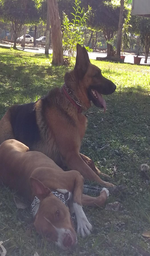

In [31]:
img_test = Image.open('./data/test/test1.jpg')
img_test = img_test.resize((150, 256), Image.ANTIALIAS)
img_test

#### Prueba 2

In [32]:
predict_image = test_features[1]
prediction = kmeans.predict(predict_image.reshape(1, -1))
label_map[prediction[0]]

'american_staffordshire_terrier'

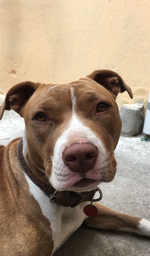

In [33]:
img_test = Image.open('./data/test/test2.jpg')
img_test = img_test.resize((150, 256), Image.ANTIALIAS)
img_test